In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from itertools import combinations

X = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 4/Default.csv')
print(X)

      Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]


In [73]:
#CHANGE STUDENT TO 1=YES, 0=NO

def stu_change(x):
    if x == 'No':
        x = 0
        return x
    if x == 'Yes':
        x = 1
        return x
        
new_stu_col = X['student'].apply(stu_change)
X['student'] = new_stu_col

print(X)

      Unnamed: 0 default  student      balance        income
0              1      No        0   729.526495  44361.625074
1              2      No        1   817.180407  12106.134700
2              3      No        0  1073.549164  31767.138947
3              4      No        0   529.250605  35704.493935
4              5      No        0   785.655883  38463.495879
...          ...     ...      ...          ...           ...
9995        9996      No        0   711.555020  52992.378914
9996        9997      No        0   757.962918  19660.721768
9997        9998      No        0   845.411989  58636.156984
9998        9999      No        0  1569.009053  36669.112365
9999       10000      No        1   200.922183  16862.952321

[10000 rows x 5 columns]


In [74]:
#CHANGE DEFAULT TO 1=YES, 0=NO

def def_change(x):
    if x == 'No':
        x = 0
        return x
    if x == 'Yes':
        x = 1
        return x
        
new_def_col = X['default'].apply(def_change)
X['default'] = new_def_col

print(X)

      Unnamed: 0  default  student      balance        income
0              1        0        0   729.526495  44361.625074
1              2        0        1   817.180407  12106.134700
2              3        0        0  1073.549164  31767.138947
3              4        0        0   529.250605  35704.493935
4              5        0        0   785.655883  38463.495879
...          ...      ...      ...          ...           ...
9995        9996        0        0   711.555020  52992.378914
9996        9997        0        0   757.962918  19660.721768
9997        9998        0        0   845.411989  58636.156984
9998        9999        0        0  1569.009053  36669.112365
9999       10000        0        1   200.922183  16862.952321

[10000 rows x 5 columns]


In [75]:
#PROBLEM 1 PART A -- LOG REG

x = X[['balance', 'income']]
y = X['default']

model = LogisticRegression()
results = model.fit(x, y)
results.coef_

array([[5.64710797e-03, 2.08091984e-05]])

In [76]:
#PROBLEM 1 PART B -- TEST ERROR

def calculate_test(testSize):
    #split into test and training data
    train, test = train_test_split(X, test_size = testSize, random_state = 5)

    #multiple logisitc regression on training data
    model = LogisticRegression()
    results = model.fit(train[['balance', 'income']], train['default'])

    #confusion matrix to determine misclasification error
    fit_logit_train = logit('default ~ balance + income', train).fit()
    train_pred = fit_logit_train.predict(test)

    #converting probability to labels
    def convert_prob_to_label(prob, cutoff = 0.5):
        label = None
        if prob > cutoff:
            label = 1
        else:
            label = 0
        return label

    pred_labels = list(map(convert_prob_to_label, train_pred))
    pred_labels = np.asarray(pred_labels)

    #confusion matrix to plot test data against predicted labels
    conf_matrix = confusion_matrix(test['default'], pred_labels)

    #misclassification error calculation based on predicted labels
    mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test)
    print(f"Misclassification rate = {mis_rate :.5f}")

calculate_test(0.2)

Optimization terminated successfully.
         Current function value: 0.080363
         Iterations 10
Misclassification rate = 0.02450


In [77]:
#PROBLEM 1 PART C -- REPEAT PART B x3

calculate_test(0.1)
calculate_test(0.25)
calculate_test(0.3)

Optimization terminated successfully.
         Current function value: 0.080344
         Iterations 10
Misclassification rate = 0.02600
Optimization terminated successfully.
         Current function value: 0.079099
         Iterations 10
Misclassification rate = 0.02600
Optimization terminated successfully.
         Current function value: 0.080827
         Iterations 10
Misclassification rate = 0.02500


In [78]:
#PROBLEM 1 PART D -- ADD STUDENT DUMMY VARIABLE

def calculate_test_student(testSize):
    #split into test and training data
    train, test = train_test_split(X, test_size = testSize, random_state = 5)

    #multiple logisitc regression on training data
    model = LogisticRegression()
    results = model.fit(train[['balance', 'income', 'student']], train['default'])

    #confusion matrix to determine misclasification error
    fit_logit_train = logit('default ~ balance + income + student', train).fit()
    train_pred = fit_logit_train.predict(test)

    #converting probability to labels
    def convert_prob_to_label(prob, cutoff = 0.5):
        label = None
        if prob > cutoff:
            label = 1
        else:
            label = 0
        return label

    pred_labels = list(map(convert_prob_to_label, train_pred))
    pred_labels = np.asarray(pred_labels)

    #confusion matrix to plot test data against predicted labels
    conf_matrix = confusion_matrix(test['default'], pred_labels)

    #misclassification error calculation based on predicted labels
    mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(test)
    print(f"Misclassification rate = {mis_rate :.5f}")

calculate_test_student(0.2)

#changing size of test set
calculate_test_student(0.1)
calculate_test_student(0.25)
calculate_test_student(0.3)

Optimization terminated successfully.
         Current function value: 0.080028
         Iterations 10
Misclassification rate = 0.02550
Optimization terminated successfully.
         Current function value: 0.080092
         Iterations 10
Misclassification rate = 0.02600
Optimization terminated successfully.
         Current function value: 0.078750
         Iterations 10
Misclassification rate = 0.02640
Optimization terminated successfully.
         Current function value: 0.080429
         Iterations 10
Misclassification rate = 0.02567


In [109]:
#PROBLEM 2 PART A -- SIMULATED MODEL

x = np.random.normal(0, 1, 100)

noise = np.random.normal(0, 1)

y = x - 2 * x**2 + noise

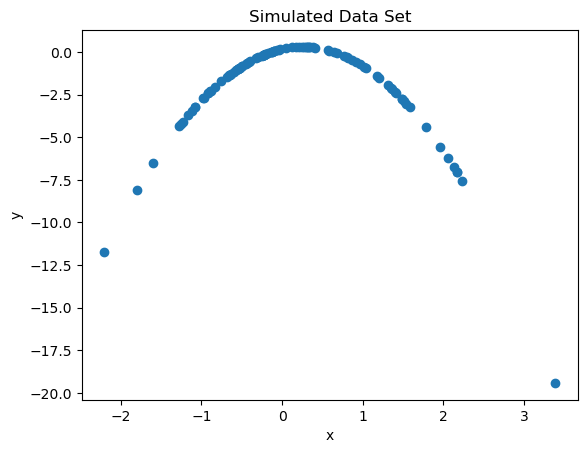

In [110]:
#PROBLEM 2 PART B -- PLOT DATA

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Data Set')
plt.show()

In [113]:
#PROBLEM 2 PART C -- LOOCV

x = x.reshape(-1, 1)

# Define the models
models = [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]

# Degrees of polynomial features for each model
degrees = [1, 2, 3, 4]

loo = LeaveOneOut()

# Loop through each model and calculate LOOCV error
for i, model in enumerate(models):
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(x)
    
    mse = 0
    
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        
        mse += mean_squared_error(y_test, y_pred)
    
    avg_mse = mse / len(x)
    
    print(f"Model {i + 1} (degree {degrees[i]}): LOOCV Error = {avg_mse}")
    
    print(model.summary())
    print("\n" + "="*50 + "\n")

Model 1 (degree 1): LOOCV Error = 8.79184681257026
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.742
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0185
Time:                        17:24:42   Log-Likelihood:                -242.20
No. Observations:                  99   AIC:                             488.4
Df Residuals:                      97   BIC:                             493.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [197]:
#PROBLEM 4 PART A

x = np.random.normal(0, 1, 100)

epsilon = np.random.normal(0, 1, 100)

In [198]:
#PROBLEM 4 PART B

Y = 3.0 + 0.5 * x - 2.0 * x**2 + 1.0 * x**3 + epsilon

print("Response vector Y:", Y)

Response vector Y: [  2.6262234  -39.94876879   4.55191424   3.43181275   2.5077383
  -0.76672873   2.08350316  -1.57793616   0.26463397   5.39164491
   1.58114284   2.33153672   1.8612477    3.77315356   2.73841144
   4.21244105   5.85850957   3.24335362   2.19245343   4.62251777
   1.27194944   2.75782828   3.39777619  -1.26391428   2.6533873
  -1.83763029   3.0396706    0.90886425   3.92331864   5.19426896
   2.42983261   1.56023227   2.71265299   5.48837876   1.94046741
   4.15831663   4.12566645  -3.03146474   3.36711365   4.34042339
   2.26865496   2.30275497   2.29487918   2.01847288   2.19909466
   1.78336762  -1.23521651  -5.6237923    3.0000893   -1.02162561
  -0.10493221 -16.50280563  -0.39063101  -3.10477833   4.08347291
   1.28554776   3.05552121   5.82596165   1.80443184   2.53650965
 -25.7992936    5.74846488  -3.70099517  -8.61269601   2.65859653
   5.42374033   2.401047     1.92137936   2.06476585   3.82772273
   3.75595128   3.61383002   1.93920345   2.64421395   2.27

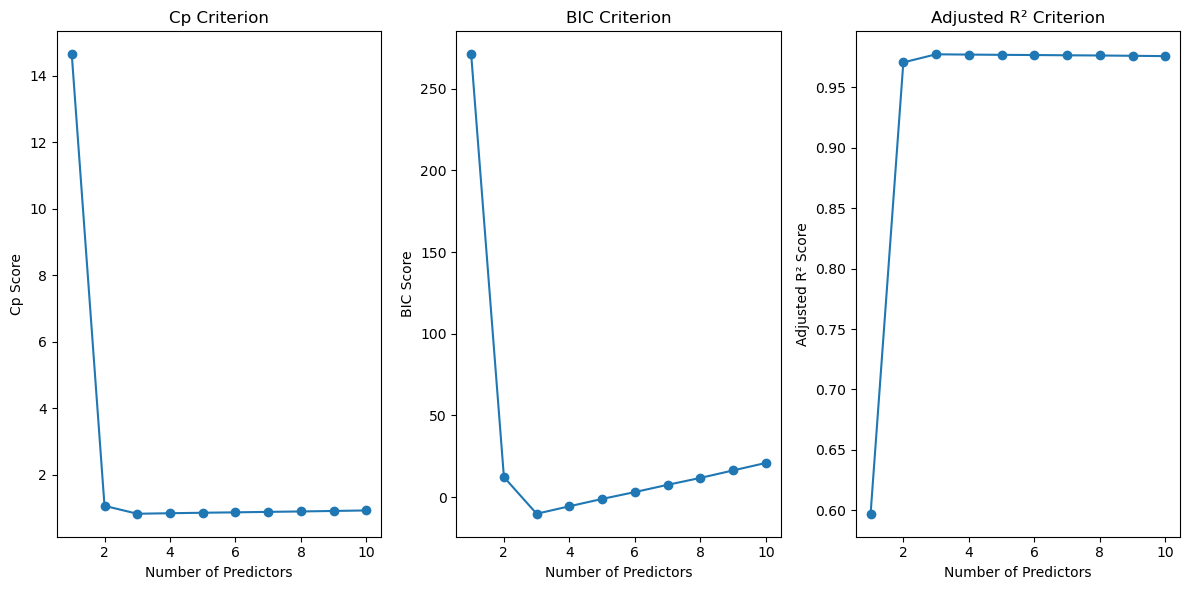

Best Subset Selection Results:
Cp Best Model Coefficients: (1,) [2.91866238]
BIC Best Model Coefficients: (1,) [2.91866238]
Adjusted R² Best Model Coefficients: (0, 1, 2) [-0.7866412   3.00907619  0.98045211]


In [217]:
#PROBLEM 4 PART C

from itertools import combinations
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define a function for best subset selection
def best_subset(estimator, X, y, max_size=10, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)
       
    # compare best subsets of each size using different criteria
    best_score_cp = -np.inf
    best_score_bic = -np.inf
    best_score_adj_r2 = -np.inf
    best_subset_cp = None
    best_subset_bic = None
    best_subset_adj_r2 = None
    list_scores_cp = []
    list_scores_bic = []
    list_scores_adj_r2 = []
    for subset in best_size_subset:
        # Calculate Cp, BIC, and adjusted R²
        subset_X = X.iloc[:, list(subset)]
        estimator.fit(subset_X, y)
        mse = np.mean((estimator.predict(subset_X) - y) ** 2)
        p = len(subset)
        n = len(y)
        cp = mse + 2 * p * mse / n
        bic = n * np.log(mse) + p * np.log(n)
        r2 = estimator.score(subset_X, y)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
       
        # Update best subset based on criteria
        if cp > best_score_cp:
            best_score_cp, best_subset_cp = cp, subset
        if bic > best_score_bic:
            best_score_bic, best_subset_bic = bic, subset
        if adj_r2 > best_score_adj_r2:
            best_score_adj_r2, best_subset_adj_r2 = adj_r2, subset

        # Store scores for plotting
        list_scores_cp.append(cp)
        list_scores_bic.append(bic)
        list_scores_adj_r2.append(adj_r2)

    return {
        "Cp": (best_subset_cp, best_score_cp, list_scores_cp),
        "BIC": (best_subset_bic, best_score_bic, list_scores_bic),
        "Adj_R2": (best_subset_adj_r2, best_score_adj_r2, list_scores_adj_r2),
        "All_Subsets": best_size_subset
    }

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame({'X1': x,
                  'X2': x**2,
                  'X3': x**3,
                  'X4': x**4,
                  'X5': x**5,
                  'X6': x**6,
                  'X7': x**7,
                  'X8': x**8,
                  'X9': x**9,
                  'X10': x**10})
epsilon = np.random.normal(0, 1, 100)
# 𝑌 = 2 -1 𝑋 + 3 𝑋2 + 1 𝑋3 + 𝜖, ADJUST HERE
y = 2 - 1 * X['X1'] + 3 * X['X2'] + 1 * X['X3'] + epsilon

# Create an instance of the Linear Regression model
estimator = LinearRegression()

# Perform best subset selection
results = best_subset(estimator, X, y, max_size=10)

# Extract results for Cp, BIC, and adjusted R²
best_subset_cp, best_score_cp, list_scores_cp = results["Cp"]
best_subset_bic, best_score_bic, list_scores_bic = results["BIC"]
best_subset_adj_r2, best_score_adj_r2, list_scores_adj_r2 = results["Adj_R2"]

# Plotting
import matplotlib.pyplot as plt

# Plot Cp
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), list_scores_cp, marker='o')
plt.title('Cp Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('Cp Score')

# Plot BIC
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), list_scores_bic, marker='o')
plt.title('BIC Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC Score')

# Plot adjusted R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), list_scores_adj_r2, marker='o')
plt.title('Adjusted R² Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R² Score')

plt.tight_layout()
plt.show()

# Report the best models and their coefficients
best_model_cp = X.iloc[:, list(best_subset_cp)]
best_model_bic = X.iloc[:, list(best_subset_bic)]
best_model_adj_r2 = X.iloc[:, list(best_subset_adj_r2)]

estimator.fit(best_model_cp, y)
coef_cp = estimator.coef_

estimator.fit(best_model_bic, y)
coef_bic = estimator.coef_

estimator.fit(best_model_adj_r2, y)
coef_adj_r2 = estimator.coef_

print("Best Subset Selection Results:")
print("Cp Best Model Coefficients:", best_subset_cp, coef_cp)
print("BIC Best Model Coefficients:", best_subset_bic, coef_bic)
print("Adjusted R² Best Model Coefficients:", best_subset_adj_r2, coef_adj_r2)

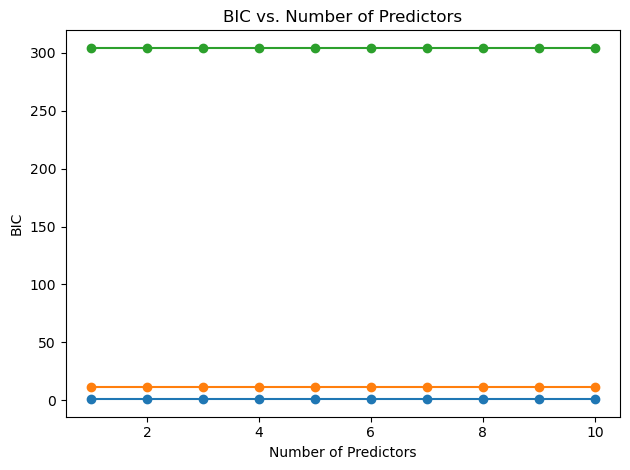

Best Subset Selection Results:
Cp Best Model Coefficients: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x14ddd1290> 11.25618412150613 [11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613, 11.25618412150613]
BIC Best Model Coefficients: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x14ddd1290> 304.23380388259847 [304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847, 304.23380388259847]
Adjusted R² Best Model Coefficients: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x14ddd1290> 0.9754887139785611 [0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.9754887139785611, 0.975488713

In [231]:
#PROBLEM 4 PART D -- FORWARD STEPWISE

# Function for forward stepwise regression
def forward_stepwise(X, y):
    included_features = []
    excluded_features = list(X.columns)
    best_adj_r2 = -np.inf
    best_cp = -np.inf
    best_bic = -np.inf
    best_model_adj_r2 = None
    best_model_cp = None
    best_model_bci = None
    
    list_scores_cp = []
    list_scores_bic = []
    list_scores_adj_r2 = []

    while len(excluded_features) > 0:

        for feature in excluded_features:
            model = sm.OLS(y, sm.add_constant(X[included_features + [feature]])).fit()
            
            mse_total = reduced_model.mse_total
            mse_model = reduced_model.mse_model
            df_model = reduced_model.df_model
            n = reduced_model.nobs
            
            adj_r2 = reduced_model.rsquared_adj
            cp = (mse_model / mse_total) - (n - 2 * df_model) / n
            bic = reduced_model.bic
            
            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                best_model_adj_r2 = model
            
            if cp > best_cp:
                best_cp = cp
                best_model_cp = model
            
            if bic > best_bic:
                best_bic = bic
                best_model_bic = model

            list_scores_cp.append(cp)
            list_scores_bic.append(bic)
            list_scores_adj_r2.append(adj_r2)
        
        else:
            break

    return {
        "Cp": (best_model_cp, best_cp, list_scores_cp),
        "BIC": (best_model_bic, best_bic, list_scores_bic),
        "Adj_R2": (best_model_adj_r2, best_adj_r2, list_scores_adj_r2)
    }

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame({'X1': x,
                  'X2': x**2,
                  'X3': x**3,
                  'X4': x**4,
                  'X5': x**5,
                  'X6': x**6,
                  'X7': x**7,
                  'X8': x**8,
                  'X9': x**9,
                  'X10': x**10})
epsilon = np.random.normal(0, 1, 100)
# 𝑌 = 2 -1 𝑋 + 3 𝑋2 + 1 𝑋3 + 𝜖, ADJUST HERE
y = 2 - 1 * X['X1'] + 3 * X['X2'] + 1 * X['X3'] + epsilon

result = forward_stepwise(X, y)

# Extract results for Cp, BIC, and adjusted R²
best_model_cp, best_cp, list_scores_cp = result["Cp"]
best_model_bic, best_bic, list_scores_bic = result["BIC"]
best_model_adj_r2, best_adj_r2, list_scores_adj_r2 = result["Adj_R2"]

# Step 5: Plotting R2
plt.plot(range(1, 11), list_scores_adj_r2, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs. Number of Predictors')

# Step 5: Plotting CP
plt.plot(range(1, 11), list_scores_cp, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('CP')
plt.title('CP vs. Number of Predictors')

# Step 5: Plotting BIC
plt.plot(range(1, 11), list_scores_bic, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')
plt.title('BIC vs. Number of Predictors')

plt.tight_layout()
plt.show()

# Step 6: Report Coefficients of the Best Models

print("Best Subset Selection Results:")
print("Cp Best Model Coefficients:", best_model_cp, best_cp, list_scores_cp)
print("BIC Best Model Coefficients:", best_model_bic, best_bic, list_scores_bic)
print("Adjusted R² Best Model Coefficients:", best_model_adj_r2, best_adj_r2, list_scores_adj_r2)

print("Cp Best Model:")
print(best_model_cp.summary())

print("BIC Best Model:")
print(best_model_bic.summary())

print("Adjusted R² Best Model:")
print(best_model_adj_r2.summary())

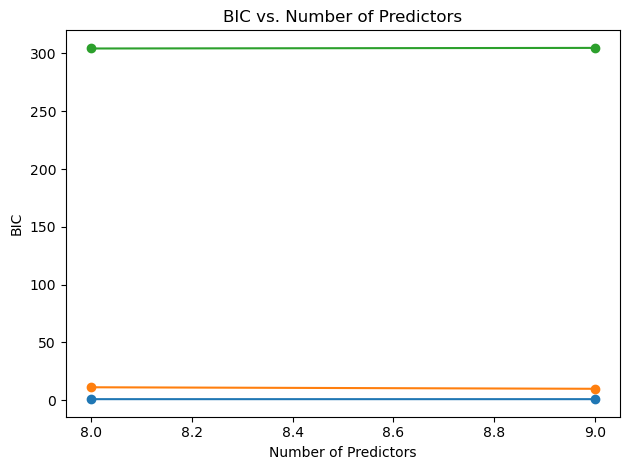

Best Model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.658
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           0.000977
Time:                        15:36:06   Log-Likelihood:                -256.91
No. Observations:                 100   AIC:                             531.8
Df Residuals:                      91   BIC:                             555.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0687      0.335      6.

In [232]:
#PROBLEM 4 PART D -- BACKWARDS STEPWISE

import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame({'X1': x,
                  'X2': x**2,
                  'X3': x**3,
                  'X4': x**4,
                  'X5': x**5,
                  'X6': x**6,
                  'X7': x**7,
                  'X8': x**8,
                  'X9': x**9,
                  'X10': x**10})
epsilon = np.random.normal(0, 1, 100)
y = 2 - 1 * X['X1'] + 3 * X['X2'] + 1 * X['X3'] +  + epsilon

# Step 1: Fit the Full Model
X_full = X[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']]
X_full = sm.add_constant(X_full)  # add a constant term for the intercept
model_full = sm.OLS(y, X_full).fit()

# Step 2: Iterative Removal
best_model_adj = model_full
best_model_cp = model_full
best_model_bic = model_full
best_adj_r2 = -np.inf
best_score_cp = -np.inf
best_score_bic = -np.inf

# Set a stopping criterion
stopping_criterion = 0.001

# Lists to store results for plotting
iterations = []
adj_r2_values = []
cp_values = []
bic_values = []

while True:
    # For each predictor, fit a model with that predictor removed
    for predictor in ['X', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']:
        predictors_subset = [col for col in X_full.columns if col != predictor]
        reduced_model = sm.OLS(y, X_full[predictors_subset]).fit()
        
        # Evaluate adjusted R^2 for the reduced model
        adj_r2 = reduced_model.rsquared_adj
        
        mse_total = reduced_model.mse_total
        mse_model = reduced_model.mse_model
        df_model = reduced_model.df_model
        n = reduced_model.nobs
        cp = (mse_model / mse_total) - (n - 2 * df_model) / n
        bic = reduced_model.bic
        
        # Check if the reduced model is better
        if adj_r2 > best_adj_r2:
            best_adj_r2 = adj_r2
            best_model_adj = reduced_model
            
        if cp > best_score_cp:
            best_score_cp = cp
            best_model_cp = reduced_model
            
        if bic > best_score_bic:
            best_score_bic = bic
            best_model_bic = reduced_model
    
    # Store values for plotting
    iterations.append(len(predictors_subset) - 1)  # number of predictors in the model
    adj_r2_values.append(adj_r2)
    cp_values.append(cp)
    bic_values.append(bic)
    
    
    # Check stopping criterion
    if len(X_full.columns) - 1 > 1:  # ensure at least one predictor remains
        improvement = adj_r2_values[-1] - adj_r2_values[-2] if len(adj_r2_values) > 1 else float('inf')
        if improvement < stopping_criterion:
            break

    # Remove the least significant predictor from the model
    predictors_subset = best_model.model.exog_names[1:]  # exclude the intercept
    worst_predictor = min(predictors_subset, key=lambda x: best_model.pvalues[x])
    X_full = X_full.drop(worst_predictor, axis=1)

# Step 5: Plotting R2
plt.plot(iterations, adj_r2_values, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs. Number of Predictors')

# Step 5: Plotting CP
plt.plot(iterations, cp_values, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('CP')
plt.title('CP vs. Number of Predictors')

# Step 5: Plotting BIC
plt.plot(iterations, bic_values, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')
plt.title('BIC vs. Number of Predictors')

plt.tight_layout()
plt.show()

# Step 6: Report Coefficients of the Best Model
print("Best Model:")
print(best_model.summary())

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9072958058185776, tolerance: 0.23962861942647856
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1631784744134706, tolerance: 0.23962861942647856
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0684414248636855, tolerance: 0.23962861942647856
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kyliehoar/anaconda3/lib/python3.11/site

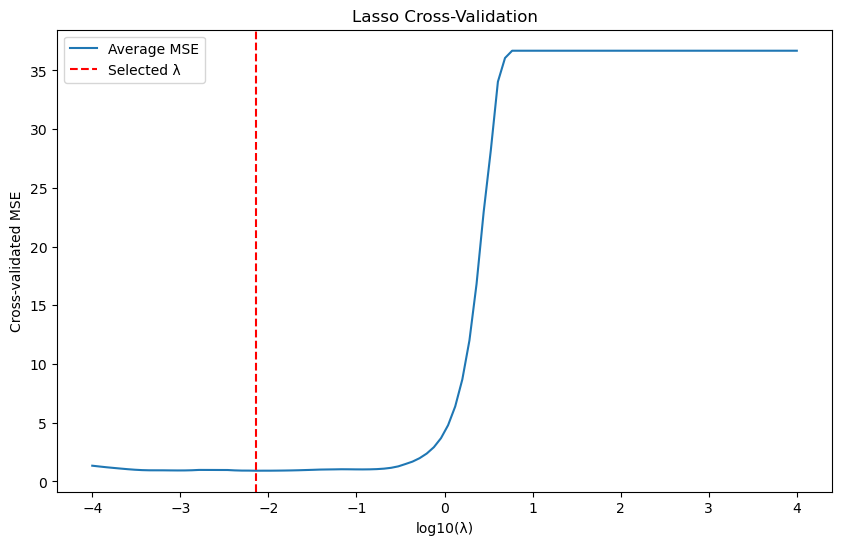

Optimal Lambda: 0.007220809018385471

Coefficient Estimates:
X1: -0.8004
X2: 4.7913
X3: 4.2425
X4: 0.0000
X5: 0.0617
X6: -0.0000
X7: 0.0000
X8: -0.0000
X9: 0.0000
X10: 0.0000


In [207]:
#PROBLEM 4 PART E

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
np.random.seed(42)
X = pd.DataFrame({'X1': x,
                  'X2': x**2,
                  'X3': x**3,
                  'X4': x**4,
                  'X5': x**5,
                  'X6': x**6,
                  'X7': x**7,
                  'X8': x**8,
                  'X9': x**9,
                  'X10': x**10})
epsilon = np.random.normal(0, 1, 100)
# 𝑌 = 2 -1 𝑋 + 3 𝑋2 + 1 𝑋3 + 𝜖, ADJUST HERE
y = 2 - 1 * X['X1'] + 3 * X['X2'] + 1 * X['X3'] +  + epsilon

# Step 2: Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit Lasso model with cross-validation
alphas = np.logspace(-4, 4, 100)  # Range of lambda values to try
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_scaled, y)

# Step 4: Plot cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lasso_cv.alphas_), lasso_cv.mse_path_.mean(axis=-1), label='Average MSE')
plt.axvline(np.log10(lasso_cv.alpha_), linestyle='--', color='red', label='Selected λ')
plt.xlabel('log10(λ)')
plt.ylabel('Cross-validated MSE')
plt.title('Lasso Cross-Validation')
plt.legend()
plt.show()

# Step 5: Report optimal lambda and coefficient estimates
optimal_lambda = lasso_cv.alpha_
coefficients = lasso_cv.coef_

print("Optimal Lambda:", optimal_lambda)
print("\nCoefficient Estimates:")
for predictor, coef in zip(X.columns, coefficients):
    print(f"{predictor}: {coef:.4f}")

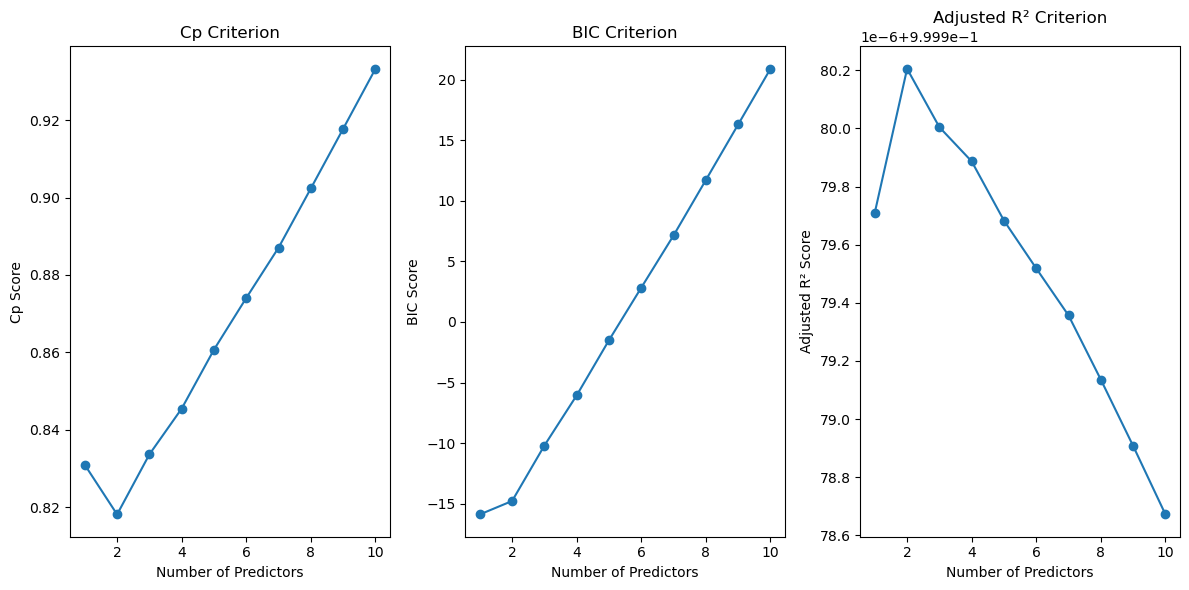

Best Subset Selection Results:
Cp Best Model Coefficients: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) [-0.04278106 -0.50688623  0.43377825  0.57322048 -0.21159557 -0.20449684
 -0.96557688  0.02813808 -0.00170111 -0.00127653]
BIC Best Model Coefficients: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) [-0.04278106 -0.50688623  0.43377825  0.57322048 -0.21159557 -0.20449684
 -0.96557688  0.02813808 -0.00170111 -0.00127653]
Adjusted R² Best Model Coefficients: (0, 6) [ 0.1793884  -1.00031057]


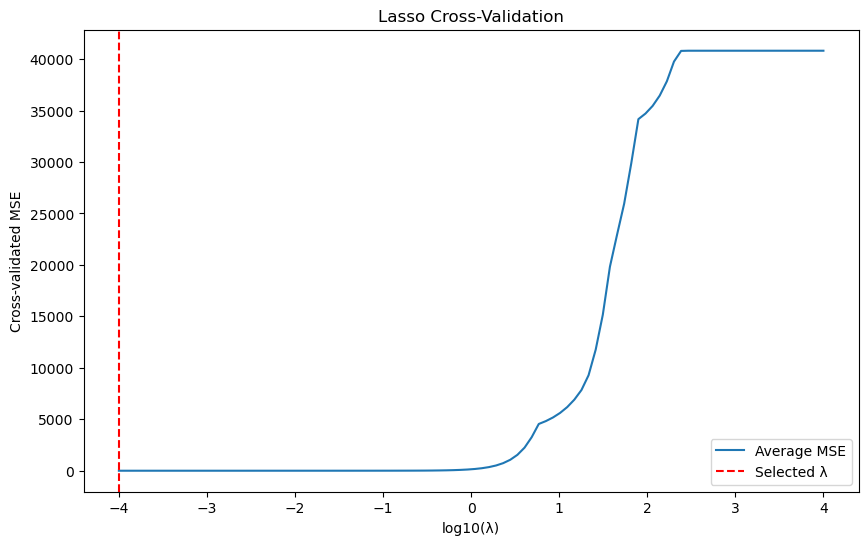

Optimal Lambda: 0.0001

Coefficient Estimates:
X1: -2.9877
X2: 0.8770
X3: 25.3106
X4: -6.2128
X5: -85.8265
X6: 11.7903
X7: -79.8217
X8: -1.1192
X9: -61.3685
X10: -8.0770


In [206]:
#PROBLEM 4 PART F

#BEST SUBSET

# Prepare the data
np.random.seed(42)
X = pd.DataFrame({'X1': x,
                  'X2': x**2,
                  'X3': x**3,
                  'X4': x**4,
                  'X5': x**5,
                  'X6': x**6,
                  'X7': x**7,
                  'X8': x**8,
                  'X9': x**9,
                  'X10': x**10})
epsilon = np.random.normal(0, 1, 100)
# 𝑌 = 2 -1 𝑋 + 3 𝑋2 + 1 𝑋3 + 𝜖, ADJUST HERE
y = 2 - 1 * X['X7'] + epsilon

results = best_subset(estimator, X, y, max_size=10)

# Extract results for Cp, BIC, and adjusted R²
best_subset_cp, best_score_cp, list_scores_cp = results["Cp"]
best_subset_bic, best_score_bic, list_scores_bic = results["BIC"]
best_subset_adj_r2, best_score_adj_r2, list_scores_adj_r2 = results["Adj_R2"]

# Plotting
import matplotlib.pyplot as plt

# Plot Cp
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), list_scores_cp, marker='o')
plt.title('Cp Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('Cp Score')

# Plot BIC
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), list_scores_bic, marker='o')
plt.title('BIC Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC Score')

# Plot adjusted R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), list_scores_adj_r2, marker='o')
plt.title('Adjusted R² Criterion')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R² Score')

plt.tight_layout()
plt.show()

# Report the best models and their coefficients
best_model_cp = X.iloc[:, list(best_subset_cp)]
best_model_bic = X.iloc[:, list(best_subset_bic)]
best_model_adj_r2 = X.iloc[:, list(best_subset_adj_r2)]

estimator.fit(best_model_cp, y)
coef_cp = estimator.coef_

estimator.fit(best_model_bic, y)
coef_bic = estimator.coef_

estimator.fit(best_model_adj_r2, y)
coef_adj_r2 = estimator.coef_

print("Best Subset Selection Results:")
print("Cp Best Model Coefficients:", best_subset_cp, coef_cp)
print("BIC Best Model Coefficients:", best_subset_bic, coef_bic)
print("Adjusted R² Best Model Coefficients:", best_subset_adj_r2, coef_adj_r2)

#LASSO

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso model with cross-validation
alphas = np.logspace(-4, 4, 100)  # Range of lambda values to try
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_scaled, y)

# Plot cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lasso_cv.alphas_), lasso_cv.mse_path_.mean(axis=-1), label='Average MSE')
plt.axvline(np.log10(lasso_cv.alpha_), linestyle='--', color='red', label='Selected λ')
plt.xlabel('log10(λ)')
plt.ylabel('Cross-validated MSE')
plt.title('Lasso Cross-Validation')
plt.legend()
plt.show()

# Report optimal lambda and coefficient estimates
optimal_lambda = lasso_cv.alpha_
coefficients = lasso_cv.coef_

print("Optimal Lambda:", optimal_lambda)
print("\nCoefficient Estimates:")
for predictor, coef in zip(X.columns, coefficients):
    print(f"{predictor}: {coef:.4f}")